**Course website**: http://lagex.github.io/geofisica2

**Note**: This notebook is part of the course "Geofísica 2" of Geology program of the 
[Universidade do Estado do Rio de Janeiro](http://www.uerj.br/). 
All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

Esse documento que você está usando é um [IPython notebook](http://ipython.org/notebook.html). É um documento interativo que mistura texto (como esse), código (como abaixo), e o resultado de executar o código (que pode ser números, texto, figuras, videos, etc).

# Prática 5 - Sísmica de refração

Utilizaremos as simulações de ondas da biblioteca [Fatiando a Terra](http://www.fatiando.org). Essas simulações utilizam o [método de diferenças finitas](http://en.wikipedia.org/wiki/Finite_difference_method) para calcular soluções da equação da onda.

As tarefas abaixo acompanham as questões que vocês devem responder. Usem as simulações abaixo para te ajudar a responder as perguntas.

## Preparação

Rode a célula abaixo para carregar as componentes necessárias para fazer as simulações. Não se preocupe se aparecer um `:0: FutureWarning: IPython widgets are experimental and may change in the future.` abaixo. Isso é consequência de utilizar tecnologia de ponta.

In [286]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from IPython.html import widgets
from fatiando import utils
from fatiando.seismic.wavefd import Ricker, ElasticPSV, ElasticSH
from fatiando.vis import mpl
import fatiando
plt.rc('font', size=12)

## Simulação de uma única interface (Moho)

In [260]:
shape = (200, 800)
spacing = 500
extent = [0, shape[1]*spacing, shape[0]*spacing, 0]
densidade = np.ones(shape)*2700
velocidade = np.ones(shape)*3200
l1 = 50e3//spacing
densidade[l1:,:] = 3300
velocidade[l1:,:] = 5000

In [261]:
sim = ElasticSH(velocidade, densidade, spacing=spacing, taper=0.003, padding=80)
sim.add_point_source((0, 100), Ricker(5, 0.5, 1/0.5))

In [262]:
print(sim.cachefile)

/home/leo/course/geofisica2/notebooks/ElasticSH-c6fCXc.h5


In [263]:
sim.run(3000)

|##################################################|100% Ran 3000 iterations in 79.1188 seconds.

In [288]:
sim.animate(every=30, embed=True, dpi=70, fps=7, cutoff=0.0001, cmap="Greys")

In [292]:
dados_moho = sim[:, 0, 100:]
distancia = np.linspace(0, spacing*shape[1], shape[1])
tempo = np.linspace(0, sim.dt*sim.it, sim.it)

In [297]:
def plota_dados(dados, distancia, tempo, scale=0.00004):
    extent = (0, distancia[-1]/1000, tempo[-1], 0)
    plt.figure(figsize=(10, 7))
    plt.imshow(dados, aspect=2, extent=extent, cmap="Greys", vmin=-scale, vmax=scale)
    plt.gca().invert_yaxis()
    plt.xlabel(u'distância da fonte (km)')
    plt.ylabel('tempo (s)')
    plt.tight_layout()

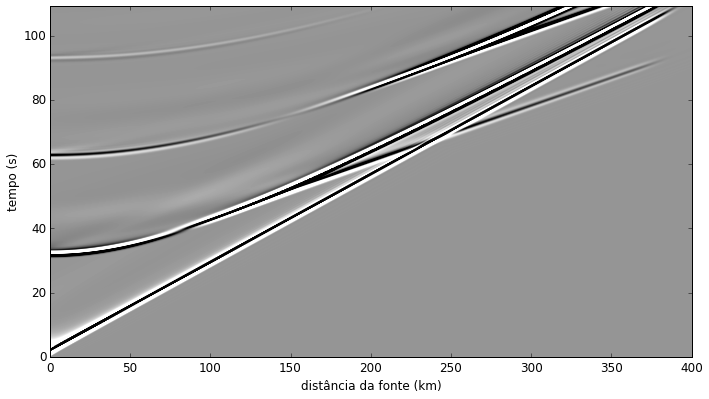

In [298]:
plota_dados(dados_moho, distancia, tempo)

## Modelagem direta para uma camada

In [ ]:
def modelo_1_camada(h, v1, v2):
    td = distancia/v1
    critico = np.arcsin(v1, v2)
    tr = distancia/v2 + 2*h*np.cos(critico)/v1
    

## Simulação de duas interfaces (bacia-embasamento e Moho)

In [267]:
shape = (200, 800)
spacing = 500
extent = [0, shape[1]*spacing, shape[0]*spacing, 0]
densidade = np.ones(shape)*1800
velocidade = np.ones(shape)*2000
l = 10e3//spacing
densidade[l:,:] = 2700
velocidade[l:,:] = 3500
l = 50e3//spacing
densidade[l:,:] = 3300
velocidade[l:,:] = 5000

In [268]:
sim2 = ElasticSH(velocidade, densidade, spacing=spacing, taper=0.003, padding=80)
sim2.add_point_source((0, 100), Ricker(5, 0.5, 1/0.5))
print(sim2.cachefile)

/home/leo/course/geofisica2/notebooks/ElasticSH-yQzuKe.h5


In [269]:
sim2.run(3000)

|##################################################|100% Ran 3000 iterations in 80.0262 seconds.

In [289]:
sim2.animate(every=30, embed=True, dpi=70, fps=7, cutoff=0.00005, cmap="Greys")

In [290]:
sec = sim2[:, 0, 100:]

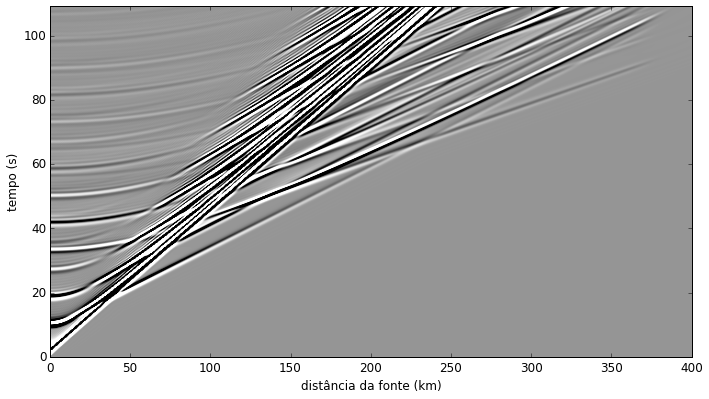

In [291]:
plt.figure(figsize=(10, 7))
scale = 0.00005
area = (0, spacing*shape[1]/1000, sim.dt*sim.it, 0)
plt.imshow(sec, aspect=2, extent=area, cmap="Greys", vmin=-scale, vmax=scale)
plt.gca().invert_yaxis()
plt.xlabel(u'distância da fonte (km)')
plt.ylabel('tempo (s)')
plt.tight_layout()

In [ ]:
shape = (200, 800)
spacing = 500
extent = [0, shape[1]*spacing, shape[0]*spacing, 0]
densidade = np.ones(shape)*2700
velocidade = np.ones(shape)*3200
l1 = 50e3//spacing
densidade[l1:,:] = 3300
velocidade[l1:,:] = 5000